In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
from tqdm import tqdm
from keras.applications.densenet import DenseNet121
import cv2
import math
import os
from glob import glob
from scipy import stats as s
from sklearn.externals import joblib 

Using TensorFlow backend.
C:\Users\HH TRADERS\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
base_model = DenseNet121(include_top=False, weights='imagenet')

In [3]:
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
________________________________________________________________________________________

__________________________________________________________________________________________________
conv2_block5_1_bn (BatchNormali (None, None, None, 1 512         conv2_block5_1_conv[0][0]        
__________________________________________________________________________________________________
conv2_block5_1_relu (Activation (None, None, None, 1 0           conv2_block5_1_bn[0][0]          
__________________________________________________________________________________________________
conv2_block5_2_conv (Conv2D)    (None, None, None, 3 36864       conv2_block5_1_relu[0][0]        
__________________________________________________________________________________________________
conv2_block5_concat (Concatenat (None, None, None, 2 0           conv2_block4_concat[0][0]        
                                                                 conv2_block5_2_conv[0][0]        
__________________________________________________________________________________________________
conv2_bloc

conv3_block4_1_conv (Conv2D)    (None, None, None, 1 28672       conv3_block4_0_relu[0][0]        
__________________________________________________________________________________________________
conv3_block4_1_bn (BatchNormali (None, None, None, 1 512         conv3_block4_1_conv[0][0]        
__________________________________________________________________________________________________
conv3_block4_1_relu (Activation (None, None, None, 1 0           conv3_block4_1_bn[0][0]          
__________________________________________________________________________________________________
conv3_block4_2_conv (Conv2D)    (None, None, None, 3 36864       conv3_block4_1_relu[0][0]        
__________________________________________________________________________________________________
conv3_block4_concat (Concatenat (None, None, None, 2 0           conv3_block3_concat[0][0]        
                                                                 conv3_block4_2_conv[0][0]        
__________

__________________________________________________________________________________________________
conv3_block9_concat (Concatenat (None, None, None, 4 0           conv3_block8_concat[0][0]        
                                                                 conv3_block9_2_conv[0][0]        
__________________________________________________________________________________________________
conv3_block10_0_bn (BatchNormal (None, None, None, 4 1664        conv3_block9_concat[0][0]        
__________________________________________________________________________________________________
conv3_block10_0_relu (Activatio (None, None, None, 4 0           conv3_block10_0_bn[0][0]         
__________________________________________________________________________________________________
conv3_block10_1_conv (Conv2D)   (None, None, None, 1 53248       conv3_block10_0_relu[0][0]       
__________________________________________________________________________________________________
conv3_bloc

conv4_block2_2_conv (Conv2D)    (None, None, None, 3 36864       conv4_block2_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block2_concat (Concatenat (None, None, None, 3 0           conv4_block1_concat[0][0]        
                                                                 conv4_block2_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block3_0_bn (BatchNormali (None, None, None, 3 1280        conv4_block2_concat[0][0]        
__________________________________________________________________________________________________
conv4_block3_0_relu (Activation (None, None, None, 3 0           conv4_block3_0_bn[0][0]          
__________________________________________________________________________________________________
conv4_block3_1_conv (Conv2D)    (None, None, None, 1 40960       conv4_block3_0_relu[0][0]        
__________

conv4_block8_0_relu (Activation (None, None, None, 4 0           conv4_block8_0_bn[0][0]          
__________________________________________________________________________________________________
conv4_block8_1_conv (Conv2D)    (None, None, None, 1 61440       conv4_block8_0_relu[0][0]        
__________________________________________________________________________________________________
conv4_block8_1_bn (BatchNormali (None, None, None, 1 512         conv4_block8_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block8_1_relu (Activation (None, None, None, 1 0           conv4_block8_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block8_2_conv (Conv2D)    (None, None, None, 3 36864       conv4_block8_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_bloc

__________________________________________________________________________________________________
conv4_block13_2_conv (Conv2D)   (None, None, None, 3 36864       conv4_block13_1_relu[0][0]       
__________________________________________________________________________________________________
conv4_block13_concat (Concatena (None, None, None, 6 0           conv4_block12_concat[0][0]       
                                                                 conv4_block13_2_conv[0][0]       
__________________________________________________________________________________________________
conv4_block14_0_bn (BatchNormal (None, None, None, 6 2688        conv4_block13_concat[0][0]       
__________________________________________________________________________________________________
conv4_block14_0_relu (Activatio (None, None, None, 6 0           conv4_block14_0_bn[0][0]         
__________________________________________________________________________________________________
conv4_bloc

__________________________________________________________________________________________________
conv4_block19_0_relu (Activatio (None, None, None, 8 0           conv4_block19_0_bn[0][0]         
__________________________________________________________________________________________________
conv4_block19_1_conv (Conv2D)   (None, None, None, 1 106496      conv4_block19_0_relu[0][0]       
__________________________________________________________________________________________________
conv4_block19_1_bn (BatchNormal (None, None, None, 1 512         conv4_block19_1_conv[0][0]       
__________________________________________________________________________________________________
conv4_block19_1_relu (Activatio (None, None, None, 1 0           conv4_block19_1_bn[0][0]         
__________________________________________________________________________________________________
conv4_block19_2_conv (Conv2D)   (None, None, None, 3 36864       conv4_block19_1_relu[0][0]       
__________

conv4_block24_1_relu (Activatio (None, None, None, 1 0           conv4_block24_1_bn[0][0]         
__________________________________________________________________________________________________
conv4_block24_2_conv (Conv2D)   (None, None, None, 3 36864       conv4_block24_1_relu[0][0]       
__________________________________________________________________________________________________
conv4_block24_concat (Concatena (None, None, None, 1 0           conv4_block23_concat[0][0]       
                                                                 conv4_block24_2_conv[0][0]       
__________________________________________________________________________________________________
pool4_bn (BatchNormalization)   (None, None, None, 1 4096        conv4_block24_concat[0][0]       
__________________________________________________________________________________________________
pool4_relu (Activation)         (None, None, None, 1 0           pool4_bn[0][0]                   
__________

__________________________________________________________________________________________________
conv5_block5_1_relu (Activation (None, None, None, 1 0           conv5_block5_1_bn[0][0]          
__________________________________________________________________________________________________
conv5_block5_2_conv (Conv2D)    (None, None, None, 3 36864       conv5_block5_1_relu[0][0]        
__________________________________________________________________________________________________
conv5_block5_concat (Concatenat (None, None, None, 6 0           conv5_block4_concat[0][0]        
                                                                 conv5_block5_2_conv[0][0]        
__________________________________________________________________________________________________
conv5_block6_0_bn (BatchNormali (None, None, None, 6 2688        conv5_block5_concat[0][0]        
__________________________________________________________________________________________________
conv5_bloc

__________________________________________________________________________________________________
conv5_block11_0_bn (BatchNormal (None, None, None, 8 3328        conv5_block10_concat[0][0]       
__________________________________________________________________________________________________
conv5_block11_0_relu (Activatio (None, None, None, 8 0           conv5_block11_0_bn[0][0]         
__________________________________________________________________________________________________
conv5_block11_1_conv (Conv2D)   (None, None, None, 1 106496      conv5_block11_0_relu[0][0]       
__________________________________________________________________________________________________
conv5_block11_1_bn (BatchNormal (None, None, None, 1 512         conv5_block11_1_conv[0][0]       
__________________________________________________________________________________________________
conv5_block11_1_relu (Activatio (None, None, None, 1 0           conv5_block11_1_bn[0][0]         
__________

conv5_block16_1_bn (BatchNormal (None, None, None, 1 512         conv5_block16_1_conv[0][0]       
__________________________________________________________________________________________________
conv5_block16_1_relu (Activatio (None, None, None, 1 0           conv5_block16_1_bn[0][0]         
__________________________________________________________________________________________________
conv5_block16_2_conv (Conv2D)   (None, None, None, 3 36864       conv5_block16_1_relu[0][0]       
__________________________________________________________________________________________________
conv5_block16_concat (Concatena (None, None, None, 1 0           conv5_block15_concat[0][0]       
                                                                 conv5_block16_2_conv[0][0]       
__________________________________________________________________________________________________
bn (BatchNormalization)         (None, None, None, 1 4096        conv5_block16_concat[0][0]       
__________

In [4]:
#defining the model architecture
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(50176,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(51, activation='softmax'))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              51381248  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [6]:
# loading the trained weights
model.load_weights("../Models/weightDenseNet121.hdf5")

In [7]:
# compiling the model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [8]:
location='../data/test'
classes=[]
videos=[]
test=pd.DataFrame()
for foldername in sorted(os.listdir(location)):
    classes.append(foldername)
    for files in sorted(os.listdir(location+'/'+foldername)):
        videos.append(foldername+'/'+files)
test['video_name']=videos
print(classes)
test_videos=test['video_name']
test.head()

['brush_hair', 'cartwheel', 'catch', 'chew', 'clap', 'climb', 'climb_stairs', 'dive', 'draw_sword', 'dribble', 'drink', 'eat', 'fall_floor', 'fencing', 'flic_flac', 'golf', 'handstand', 'hit', 'hug', 'jump', 'kick', 'kick_ball', 'kiss', 'laugh', 'pick', 'pour', 'pullup', 'punch', 'push', 'pushup', 'ride_bike', 'ride_horse', 'run', 'shake_hands', 'shoot_ball', 'shoot_bow', 'shoot_gun', 'sit', 'situp', 'smile', 'smoke', 'somersault', 'stand', 'swing_baseball', 'sword', 'sword_exercise', 'talk', 'throw', 'turn', 'walk', 'wave']


,video_name
0,brush_hair/April_09_brush_hair_u_nm_np1_ba_goo...
1,brush_hair/April_09_brush_hair_u_nm_np1_ba_goo...
2,brush_hair/April_09_brush_hair_u_nm_np1_ba_goo...
3,brush_hair/Blonde_being_brushed_brush_hair_f_n...
4,brush_hair/Blonde_being_brushed_brush_hair_u_c...


In [9]:
# creating the tags
train = pd.read_csv('../data/train.csv')
y = train['class']
y = pd.get_dummies(y)

In [10]:
# creating two lists to store predicted and actual tags
predict = []
actual = []

# for loop to extract frames from each test video
for i in tqdm(range(test_videos.shape[0])):
    count = 0
    videoFile = test_videos[i]
    #print('../data/test/'+videoFile)
    cap = cv2.VideoCapture('../data/test/'+videoFile.split(' ')[0].split('/')[0]+'/'+videoFile.split(' ')[0].split('/')[1])   # capturing the video from the given path
    frameRate = cap.get(5) #frame rate
    x=1
    # removing all other files from the temp folder
    files = glob('../data/temp/*')
    for f in files:
        os.remove(f)
    while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
            # storing the frames of this particular video in temp folder
#            print('../data/temp/' + "_frame%d.jpg" % count)
            filename ='../data/temp/' + "_frame%d.jpg" % count;count+=1
            cv2.imwrite(filename, frame)
    cap.release()
    
    # reading all the frames from temp folder
    images = glob("../data/temp/*.jpg")
    
    prediction_images = []
    for i in range(len(images)):
        img = image.load_img(images[i], target_size=(224,224,3))
        img = image.img_to_array(img)
        img = img/255
        prediction_images.append(img)
        
    # converting all the frames for a test video into numpy array
    prediction_images = np.array(prediction_images)
    # extracting features using pre-trained model
    prediction_images = base_model.predict(prediction_images)
    # converting features in one dimensional array
    prediction_images = prediction_images.reshape(prediction_images.shape[0], 7*7*1024)
    # predicting tags for each array
    prediction = model.predict_classes(prediction_images)
    # appending the mode of predictions in predict list to assign the tag to the video
    predict.append(y.columns.values[s.mode(prediction)[0][0]])
    # appending the actual tag of the video
    actual.append(videoFile.split('/')[0])


100%|██████████| 1530/1530 [27:40<00:00,  1.26it/s] 


In [11]:
# Save the model as a pickle in a file 
joblib.dump(predict, '../Pickle/DenseNet121_predict.pkl') 
joblib.dump(actual, '../Pickle/DenseNet121_actual.pkl')

['../Pickle/DenseNet121_actual.pkl']

In [12]:
# Load the model from the file 
history = joblib.load('../Pickle/DenseNet121_predict.pkl') 
history = joblib.load('../Pickle/DenseNet121_actual.pkl') 

In [13]:
# checking the accuracy of the predicted tags
from sklearn.metrics import accuracy_score
accuracy_score(predict, actual)*100

32.810457516339866

In [14]:
from sklearn import metrics
print(metrics.classification_report(actual,predict))

C:\Users\HH TRADERS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                precision    recall  f1-score   support

    brush_hair       0.28      0.50      0.36        30
     cartwheel       0.08      0.13      0.10        30
         catch       0.41      0.47      0.44        30
          chew       0.44      0.23      0.30        30
          clap       0.00      0.00      0.00        30
         climb       0.34      0.73      0.47        30
  climb_stairs       0.25      0.67      0.36        30
          dive       0.10      0.17      0.13        30
    draw_sword       0.32      0.23      0.27        30
       dribble       0.46      0.77      0.57        30
         drink       0.17      0.27      0.21        30
           eat       0.13      0.33      0.19        30
    fall_floor       0.00      0.00      0.00        30
       fencing       0.47      0.23      0.31        30
     flic_flac       0.14      0.03      0.05        30
          golf       0.55      0.73      0.63        30
     handstand       0.33      0.33      0.33  

In [15]:
cm=metrics.confusion_matrix(actual,predict)
print(cm)

[[15  0  0 ...  0  0  0]
 [ 0  4  0 ...  0  0  0]
 [ 0  1 14 ...  0  0  0]
 ...
 [ 1  0  0 ...  0  3  0]
 [ 1  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  1  0]]


Text(0.5, 1, 'Accuracy score: 32.810457516339866')

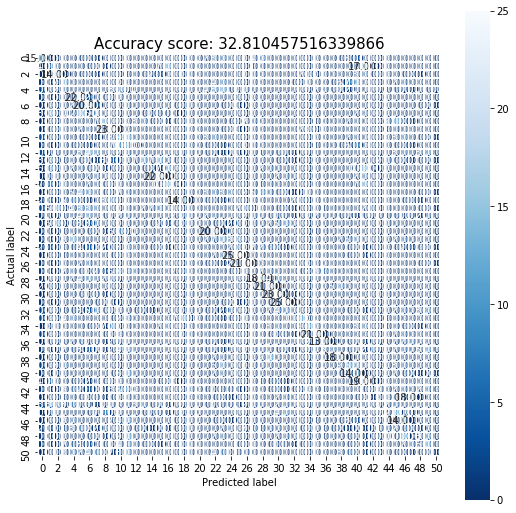

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel("Predicted label")
all_sample_title="Accuracy score: {0}".format(metrics.accuracy_score(predict, actual)*100)
plt.title(all_sample_title,size=15)